## *<center>Importing Libraries<center>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv('data.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## * <center>EDA<center>

In [33]:
df.columns.to_list()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [36]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [37]:
df.shape               

(32581, 12)

In [38]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [39]:
#Analizing categorical variables

In [40]:
#Categorical features
df.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [41]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [42]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [43]:
df.loan_grade.value_counts() #Ordinal Variable

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [44]:
#analyzing numeric variables

In [45]:
df.select_dtypes(include=['int64',"float64"])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


(0.0, 80.0)

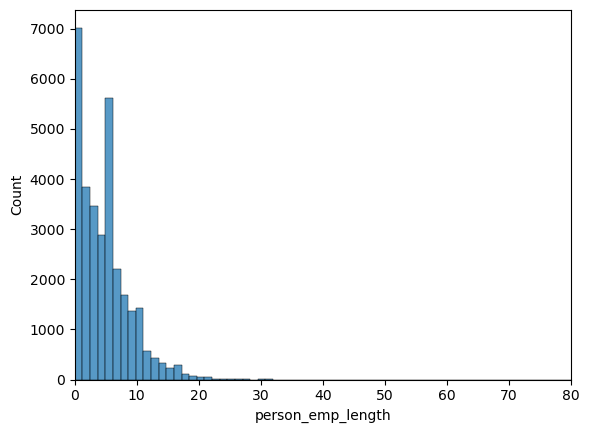

In [46]:
# bunu etmekde sebebim outlier detection ve removal ucun z-score yoxsa quantile istifade etmeyimdir
sns.histplot(data=df,x='person_emp_length',bins=100)
plt.xlim(0, 80)

(0.0, 300000.0)

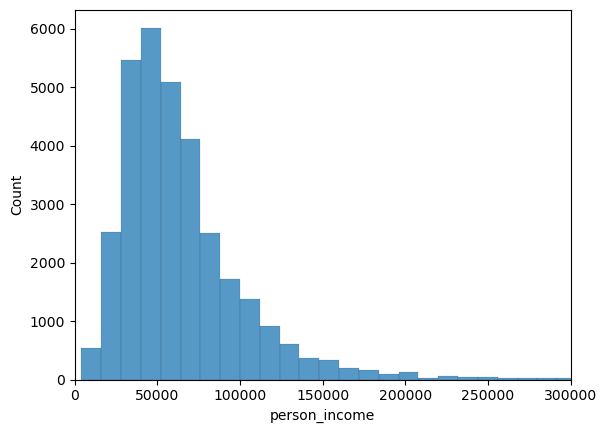

In [47]:
sns.histplot(data=df,x='person_income',bins=500)
plt.xlim(0, 300000)

In [48]:
#Outlier Handling actually preproocessing step 
def outlier_detection(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data (outliers silinir)
    clean_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return clean_data

In [49]:
df.shape

(32581, 12)

In [50]:
df = outlier_detection(df,'person_income')

In [51]:
df = outlier_detection(df,'person_emp_length')

In [52]:
df.shape

(29457, 12)

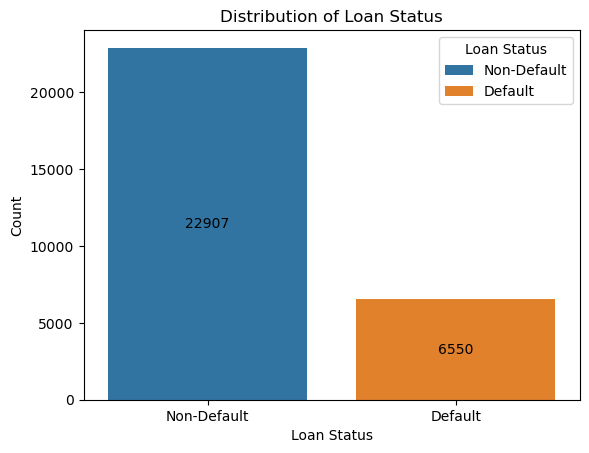

In [53]:
#Class inbalance yoxladim count plot ile.

sns.countplot(x="loan_status", data=df,hue="loan_status")
# X oxundakı tick-ləri dəyiş
plt.xticks([0, 1], ["Non-Default", "Default"])
# Öz legendini təyin et
plt.legend(["Non-Default", "Default"], title="Loan Status", loc="upper right")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")

# Put counts inside bars (middle)
for container in plt.gca().containers:
    plt.bar_label(container, label_type='center', color="black")

plt.show()


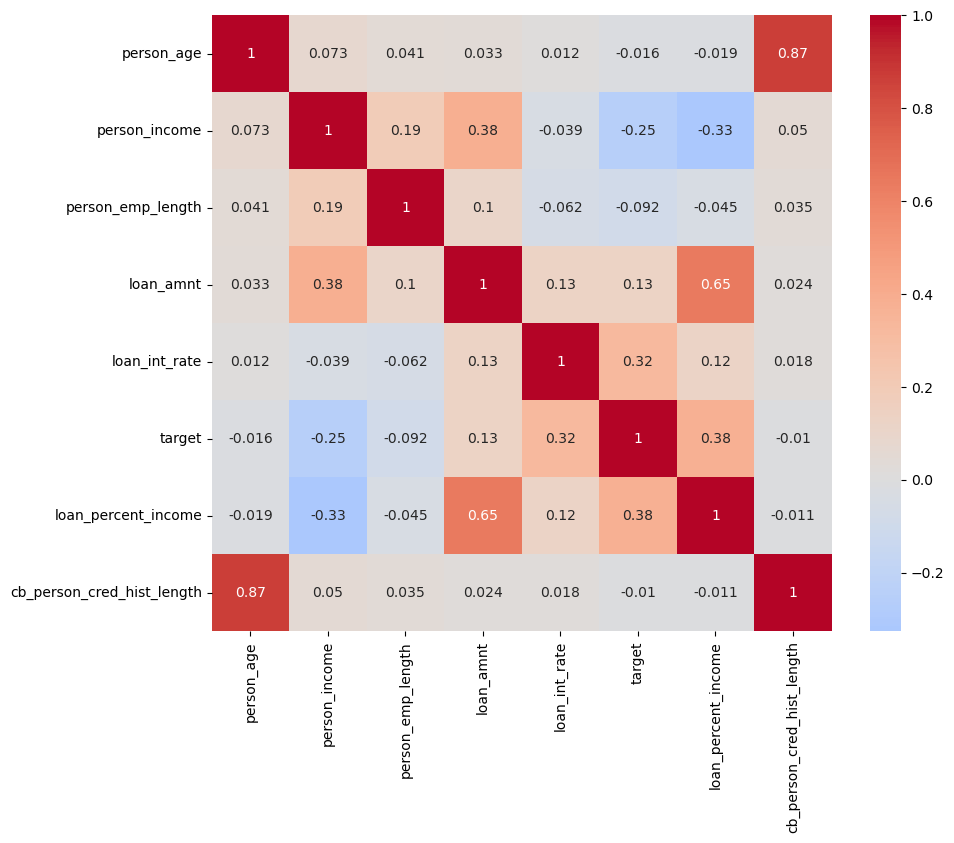

In [98]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()
#Logistic Regression edərkən person_age ilə cb_person_cred_hist_length çox korrelyasiyalıdır.
#Onlardan birini çıxartmalısan → ən yaxşı seçim person_age-i çıxarmaqdır

## * <center>Preprocessing<center>

In [54]:
#Handling Null value
#normally distributed olmayanda median inpute ele

In [55]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [56]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [57]:
#Categoric valuelara dummy apply etmeliyem

In [58]:
df.select_dtypes(include=object)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32575,RENT,EDUCATION,B,N
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N


In [70]:
#targeti define edirem
df = df.rename(columns={'loan_status': 'target'})

In [81]:
X = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [82]:
# ====== 3. Skew düzəltmək üçün log transform (yalnız train-də fit etmək lazım deyil, sabit funksiya)
skewed_cols = ["person_income", "loan_amnt", "loan_percent_income"]

for col in skewed_cols:
    X_train[col] = np.log1p(X_train[col])
    X_test[col]  = np.log1p(X_test[col])


In [83]:
# ====== 4. Scaling (StandardScaler) – yalnız train-də fit, test-də transform
num_cols = [
    "person_age","person_income","person_emp_length","loan_amnt",
    "loan_int_rate","loan_percent_income","cb_person_cred_hist_length"
]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [84]:
# --- Binary (Y/N → 0/1) sabit mapping, leakage yoxdur
X_train["cb_person_default_on_file"] = X_train["cb_person_default_on_file"].map({"Y":1,"N":0})
X_test["cb_person_default_on_file"]  = X_test["cb_person_default_on_file"].map({"Y":1,"N":0})

In [85]:
# --- Ordinal (A-G sıralıdır)
ordinal_map = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
X_train["loan_grade"] = X_train["loan_grade"].map(ordinal_map)
X_test["loan_grade"]  = X_test["loan_grade"].map(ordinal_map)

In [88]:
# --- Nominal (OneHotEncoder)
nominal_cols = ["person_home_ownership", "loan_intent"]

ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)

X_train_ohe = ohe.fit_transform(X_train[nominal_cols])
X_test_ohe  = ohe.transform(X_test[nominal_cols])

# Yeni sütun adları götürək
ohe_cols = ohe.get_feature_names_out(nominal_cols)

# DataFrame-ə çevir
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
X_test_ohe  = pd.DataFrame(X_test_ohe,  columns=ohe_cols, index=X_test.index)


In [89]:
# Kohne nominal sütunları at, yeni encoded sütunları əlavə et
X_train = pd.concat([X_train.drop(columns=nominal_cols), X_train_ohe], axis=1)
X_test  = pd.concat([X_test.drop(columns=nominal_cols),  X_test_ohe], axis=1)


In [ ]:
#Handling Imbalance

In [90]:
# ====== 6. Imbalance həlli (SMOTE yalnız train set-də)
print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE :", y_train_res.value_counts())


Before SMOTE: target
0    18325
1     5240
Name: count, dtype: int64
After SMOTE : target
0    18325
1    18325
Name: count, dtype: int64


In [96]:
"""
Son yoxlamalar (tez baxış)

NA qalıb? X_train.isna().sum().sum() və X_test.isna().sum().sum() → 0 olmalıdır.
Log üçün mənfi/NaN? (sən log1p etmisən, 0-dan kiçik olmamalıdır).
Sütun uyğunluğu: X_train.columns.equals(X_test.columns) → True olmalıdır.
Class balansı: SMOTE sonrası y_train_res.value_counts() balanslıdır?
Multicollinearity: çox korrelyasiya edən numeric-lər varsa (|ρ|>0.9) birini çıxarmaq faydalıdır.
Information leakage? Məs: loan_int_rate birbaşa qərardan törəmiş deyilmi? (səndə normaldır).
"""

'\nSon yoxlamalar (tez baxış)\n\nNA qalıb? X_train.isna().sum().sum() və X_test.isna().sum().sum() → 0 olmalıdır.\nLog üçün mənfi/NaN? (sən log1p etmisən, 0-dan kiçik olmamalıdır).\nSütun uyğunluğu: X_train.columns.equals(X_test.columns) → True olmalıdır.\nClass balansı: SMOTE sonrası y_train_res.value_counts() balanslıdır?\nMulticollinearity: çox korrelyasiya edən numeric-lər varsa (|ρ|>0.9) birini çıxarmaq faydalıdır.\nInformation leakage? Məs: loan_int_rate birbaşa qərardan törəmiş deyilmi? (səndə normaldır).\n'

In [93]:
X_train.isna().sum().sum()

0

In [94]:
X_train.columns.equals(X_test.columns)

True

In [95]:
y_train_res.value_counts()

target
0    18325
1    18325
Name: count, dtype: int64

## * <center>Model Development<center>

In [102]:
# ====================== SIMPLE BUT BETTER LOGREG ======================
# Şərt: X_train, X_test, y_train, y_test hazırdır (1=bad, 0=good)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve
)
from sklearn.calibration import CalibratedClassifierCV

RANDOM_STATE = 42

# ---- 1) Cost-based threshold (sadə və praktik) ----
def select_threshold_cost(y_true, y_prob, cost_fn=5.0, cost_fp=1.0):
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    P = (np.asarray(y_true) == 1).sum()
    N = (np.asarray(y_true) == 0).sum()
    costs = cost_fn * (1 - tpr) * P + cost_fp * fpr * N
    return float(thr[np.argmin(costs)])

# ---- 2) Kiçik amma faydalı param grid + Stratified CV ----
param_grid = [
    # liblinear: L1/L2 üçün sabit seçim
    {"solver": ["liblinear"], "penalty": ["l2", "l1"], "C": [0.1, 1.0, 10.0],
     "class_weight": [None, "balanced"], "max_iter": [2000]},
    # saga: böyük data/elasticnet üçün çevik; burada l2 saxlayırıq ki, sadə qalsın
    {"solver": ["saga"], "penalty": ["l2"], "C": [0.1, 1.0, 10.0],
     "class_weight": [None, "balanced"], "max_iter": [5000], "n_jobs": [-1], "random_state": [RANDOM_STATE]},
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Base model (penalty/grid daxilində təyin olunacaq, burada yalnız seed veririk)
base_lr = LogisticRegression(random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=base_lr,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=0
)

# ---- 3) Fit (yalnız TRAIN) ----
grid.fit(X_train_res, y_train_res)
best_lr = grid.best_estimator_
print("Best params:", grid.best_params_)
print("CV ROC-AUC :", round(grid.best_score_, 4))

# ---- 4) (Opsional amma faydalı) Kalibrasiya ----
# Ehtimalların real müşahidə ilə uyğunluğu yaxşılaşır.
calibrated = CalibratedClassifierCV(estimator=best_lr, method="isotonic", cv=5)
calibrated.fit(X_train_res, y_train_res)

# ---- 5) TEST ehtimalı + threshold seçimi ----
y_prob = calibrated.predict_proba(X_test)[:, 1]
thr = select_threshold_cost(y_test, y_prob, cost_fn=5.0, cost_fp=1.0)  # FN 5x daha bahalı
y_pred = (y_prob >= thr).astype(int)
print("Chosen threshold (cost-based):", round(thr, 3))

# ---- 6) Sadə, aydın metriklər ----
auc  = roc_auc_score(y_test, y_prob)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
cm   = confusion_matrix(y_test, y_pred, labels=[0,1])

print(f"AUC={auc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")
print("Confusion Matrix [ [TN FP] [FN TP] ]:\n", cm)

# ---- 7) Koeflər (izahlılıq) ----
# Qeyd: coeff-lər kalibrasiyadan əvvəlki modeldədir (best_lr).
coefs = best_lr.coef_.ravel()
feat_names = getattr(X_train_res, "columns", [f"x{i}" for i in range(len(coefs))])
coef_table = pd.DataFrame({
    "feature": feat_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs),
    "sign": np.where(coefs >= 0, "+", "-")
}).sort_values("abs_coef", ascending=False)
print("\nTop 10 features by |coef|:\n", coef_table.head(10))


Best params: {'C': 0.1, 'class_weight': None, 'max_iter': 5000, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}
CV ROC-AUC : 0.8705
Chosen threshold (cost-based): 0.396
AUC=0.875 | Precision=0.493 | Recall=0.835 | F1=0.620
Confusion Matrix [ [TN FP] [FN TP] ]:
 [[3458 1124]
 [ 216 1094]]

Top 10 features by |coef|:
                        feature      coef  abs_coef sign
10   person_home_ownership_OWN -1.799987  1.799987    -
6          loan_percent_income  1.536968  1.536968    +
16         loan_intent_VENTURE -1.172282  1.172282    -
4                    loan_amnt -0.850746  0.850746    -
12       loan_intent_EDUCATION -0.822758  0.822758    -
3                   loan_grade  0.769991  0.769991    +
11  person_home_ownership_RENT  0.567994  0.567994    +
15        loan_intent_PERSONAL -0.545219  0.545219    -
7    cb_person_default_on_file -0.247094  0.247094    -
5                loan_int_rate  0.189867  0.189867    +


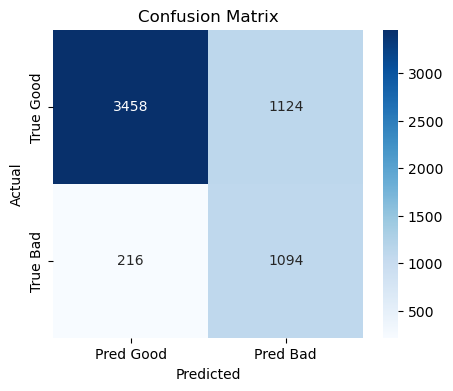

In [103]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred Good","Pred Bad"], yticklabels=["True Good","True Bad"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


Best params (XGB): {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.07, 'colsample_bytree': 0.9}
CV ROC-AUC (XGB): 0.9858
Chosen threshold (cost-based, XGB): 0.12
AUC=0.942 | Precision=0.624 | Recall=0.875 | F1=0.729
Confusion Matrix [ [TN FP] [FN TP] ]:
 [[3892  690]
 [ 164 1146]]


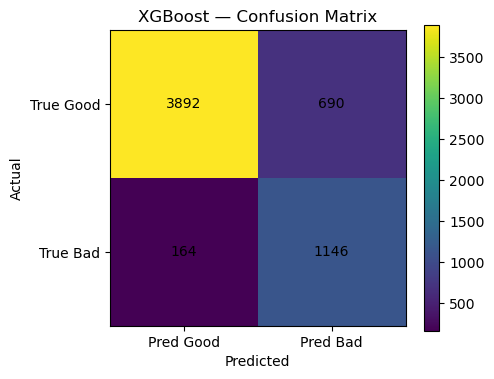


Top 15 features by gain (XGB):
                         feature       gain
3                    loan_grade  85.147614
11   person_home_ownership_RENT  58.220604
6           loan_percent_income  53.781216
10    person_home_ownership_OWN  40.644848
16          loan_intent_VENTURE  37.389748
12        loan_intent_EDUCATION  30.932270
13  loan_intent_HOMEIMPROVEMENT  30.295509
15         loan_intent_PERSONAL  25.993242
8    cb_person_cred_hist_length  23.978321
14          loan_intent_MEDICAL  21.438873
1                 person_income  19.137375
2             person_emp_length  18.199785
0                    person_age  15.311740
5                 loan_int_rate  13.911499
9   person_home_ownership_OTHER  12.921732


In [105]:
# ============================ XGBOOST for CREDIT RISK (FULL, COMMENTED) ============================
# Məqsəd:
#  - XGBoost ilə binary klassifikasiya (1=bad, 0=good) — kredit riski
#  - Kiçik RandomizedSearchCV (AUC scoring) — tez və faydalı tuning
#  - Ehtimal kalibrasiyası (isotonic) — PD-lər daha real olsun
#  - Cost-based threshold — FP/FN balansını biznes xərcinə görə seçirik
#  - Hesabat: AUC, Precision, Recall, F1, Confusion Matrix (vizual)
#  - Feature importance (gain) — robust şəkildə adlandırma (f0.. və ya real adlar)
#
# Qeydlər:
#  - Resampling (SMOTE) etmisənsə -> scale_pos_weight = 1 saxla (aşağıda belədir).
#  - Resampling YOXDURSA -> scale_pos_weight ≈ (#good / #bad) vermək faydalıdır.
#  - X_test preprocessing-in (kolon sırası, encoder mapping) X_train-lə eyni olmalıdır.
import re

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve
)
from sklearn.calibration import CalibratedClassifierCV

# XGBoost importu — quraşdırılmayıbsa: pip install xgboost
from xgboost import XGBClassifier

RANDOM_STATE = 42

# ---------------------------------------------------------------------------------------------------
# 1) Cost-based threshold seçimi
#    Idea: Biznesdə adətən FN (risqli müştərini buraxmaq) FP-dən daha bahadır.
#    Ona görə "expected cost" minimum olan threshold-u seçirik.
# ---------------------------------------------------------------------------------------------------
def select_threshold_cost(y_true, y_prob, cost_fn=5.0, cost_fp=1.0):
    """
    y_true: 0/1 (1=bad)
    y_prob: modelin verdiyi ehtimallar (bad olma ehtimalı)
    cost_fn: False Negative-in nisbi xərci
    cost_fp: False Positive-in nisbi xərci
    """
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    P = (np.asarray(y_true) == 1).sum()  # neçə bad var
    N = (np.asarray(y_true) == 0).sum()  # neçə good var
    # E[cost] = cost_fn * FN + cost_fp * FP
    # FN = (1-TPR)*P ; FP = FPR*N
    costs = cost_fn * (1 - tpr) * P + cost_fp * fpr * N
    return float(thr[np.argmin(costs)])

# ---------------------------------------------------------------------------------------------------
# 2) Kiçik, praktik param axtarışı (RandomizedSearchCV)
#    Niyə randomized? -> GridSearch-dən daha sürətli, kifayət qədər nəticəlidir.
#    Ağac metodu 'hist' -> CPU-da daha sürətli treyn
# ---------------------------------------------------------------------------------------------------
param_dist = {
    # Ağac sayı — çox böyük etməyə gərək yoxdur; calibrasiya + threshold sonrakı mərhələlərdir
    "n_estimators":      [200, 300, 500],
    # Ağac dərinliyi — 3–6 aralığı kredit risk üçün tipikdir
    "max_depth":         [3, 4, 5, 6],
    # Öyrənmə tempi — kiçik dəyərlər daha sabit, böyük dəyərlər daha sürətli
    "learning_rate":     [0.03, 0.05, 0.07, 0.1],
    # Row/column subsampling — overfit-in qarşısını alır
    "subsample":         [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree":  [0.7, 0.8, 0.9, 1.0],
    # Regularizasiya — L2/L1
    "reg_lambda":        [1.0, 3.0, 5.0, 10.0],
    "reg_alpha":         [0.0, 0.1, 0.5, 1.0],
    # Imbalance üçün (yalnız resampling yoxdursa aç) :
    # "scale_pos_weight": [1.0, 2.0, 3.0, 5.0, 10.0],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

base_xgb = XGBClassifier(
    objective="binary:logistic",   # 0..1 ehtimal
    eval_metric="auc",             # daxili AUC metric (sklearn scoring ayrıca AUC verəcək)
    tree_method="hist",            # sürətli CPU təlimi
    random_state=RANDOM_STATE,
    n_jobs=-1                      # bütün nüvələr
)

search = RandomizedSearchCV(
    estimator=base_xgb,
    param_distributions=param_dist,
    n_iter=25,                     # 25 iter — praktik kompromis (dəyişdirilə bilər)
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=0,
    refit=True                     # ən yaxşısını avtomatik refit etsin
)

# ---------------------------------------------------------------------------------------------------
# 3) Modeli fit et
#    Səndə resampled train var (X_train_res, y_train_res). YOXDURSA X_train, y_train yaz.
# ---------------------------------------------------------------------------------------------------
# !!! ƏGƏR RESAMPLING YOXDURSA: search.fit(X_train, y_train)
search.fit(X_train_res, y_train_res)

best_xgb = search.best_estimator_
print("Best params (XGB):", search.best_params_)
print("CV ROC-AUC (XGB):", round(search.best_score_, 4))

# ---------------------------------------------------------------------------------------------------
# 4) (Opsional ama faydalı) Kalibrasiya
#    Niyə? XGBoost ehtimalları bəzən “kəskin” olur (under/over-confidence).
#    Isotonic calibration ehtimalların PD kimi daha real olmasına kömək edir.
#    Qeyd: Kalibrasiya da TRAIN üzərində (CV ilə) edilir; TEST yalnız qiymətləndirmə üçündür.
# ---------------------------------------------------------------------------------------------------
calibrated_xgb = CalibratedClassifierCV(
    estimator=best_xgb,
    method="isotonic",  # alternativ: "sigmoid" (Platt scaling) — data azdırsa daha stabil ola bilər
    cv=5
)
# !!! ƏGƏR RESAMPLING YOXDURSA: calibrated_xgb.fit(X_train, y_train)
calibrated_xgb.fit(X_train_res, y_train_res)

# ---------------------------------------------------------------------------------------------------
# 5) TEST ehtimalları + threshold seçimi (cost-based)
#    Burada artıq TEST-ə baxırıq: cutoff-u biznes xərci ilə optimallaşdırırıq.
# ---------------------------------------------------------------------------------------------------
y_prob = calibrated_xgb.predict_proba(X_test)[:, 1]  # 1 = bad ehtimalı
thr = select_threshold_cost(y_test, y_prob, cost_fn=5.0, cost_fp=1.0)  # FN 5x bahadır (nümunə)
y_pred = (y_prob >= thr).astype(int)
print("Chosen threshold (cost-based, XGB):", round(thr, 3))

# ---------------------------------------------------------------------------------------------------
# 6) Hesabat metrikləri (sadə və aydın)
# ---------------------------------------------------------------------------------------------------
auc  = roc_auc_score(y_test, y_prob)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
cm   = confusion_matrix(y_test, y_pred, labels=[0,1])

print(f"AUC={auc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")
print("Confusion Matrix [ [TN FP] [FN TP] ]:\n", cm)

# ---------------------------------------------------------------------------------------------------
# 7) Confusion Matrix — sadə vizual (yalnız matplotlib)
# ---------------------------------------------------------------------------------------------------
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("XGBoost — Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Pred Good","Pred Bad"])
plt.yticks(tick_marks, ["True Good","True Bad"])
# Rəqəmləri hüceyrəyə yaz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, int(cm[i, j]), ha="center", va="center")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------------------------------
# 8) Feature importance (gain) — robust adlandırma
#    XGBoost booster.get_score() bəzən 'f0','f1'... qaytarır, bəzən isə birbaşa kolon adlarını.
#    Aşağıdakı kod hər iki halı dəstəkləyir.
# ---------------------------------------------------------------------------------------------------
booster = best_xgb.get_booster()
importances = booster.get_score(importance_type="gain")  # dict: key -> score

feat_names = getattr(X_train_res, "columns", None)  # DataFrame-dirsə adları götür
rows = []
pattern = re.compile(r"^f(\d+)$")  # 'f12' kimi açarları tutmaq üçün

for k, v in importances.items():
    m = pattern.match(k)
    if m and feat_names is not None:
        # 'f#' formasındadır → indeksi real ada map et
        idx = int(m.group(1))
        name = feat_names[idx] if idx < len(feat_names) else k
    else:
        # onsuz da real ad gəlir və ya feat_names yoxdur → olduğu kimi saxla
        name = k
    rows.append((name, v))

imp_df = pd.DataFrame(rows, columns=["feature", "gain"]).sort_values("gain", ascending=False)
print("\nTop 15 features by gain (XGB):\n", imp_df.head(15))

# ---------------------------------------------------------------------------------------------------
# 9) (Opsional) Threshold-u biznes tələbinə görə hədəflə
#    Məs: “Precision ən azı 60% olsun” deyə şərt qoya bilərsən:
# ---------------------------------------------------------------------------------------------------
# from sklearn.metrics import precision_recall_curve
# precs, recs, thrs = precision_recall_curve(y_test, y_prob)
# target_p = 0.60
# idx = np.argmax(precs >= target_p)
# thr_p60 = thrs[idx] if idx < len(thrs) else 0.5
# print("Threshold for >=60% Precision:", round(thr_p60, 3))
# y_pred_p60 = (y_prob >= thr_p60).astype(int)
# print("P(>=60%)=", precision_score(y_test, y_pred_p60, zero_division=0),
#       "R=", recall_score(y_test, y_pred_p60, zero_division=0))
#
# Qeyd: Precision ↑ edəndə Recall adətən ↓ olur; biznes prioritetinə uyğun seç.

# ---------------------------------------------------------------------------------------------------
# 10) (Opsional) Modeli saxla — production üçün
# ---------------------------------------------------------------------------------------------------
# import joblib
# joblib.dump(calibrated_xgb, "xgb_calibrated_credit_risk.joblib")
# imp_df.to_csv("xgb_feature_importance_gain.csv", index=False)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15548\3609455111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


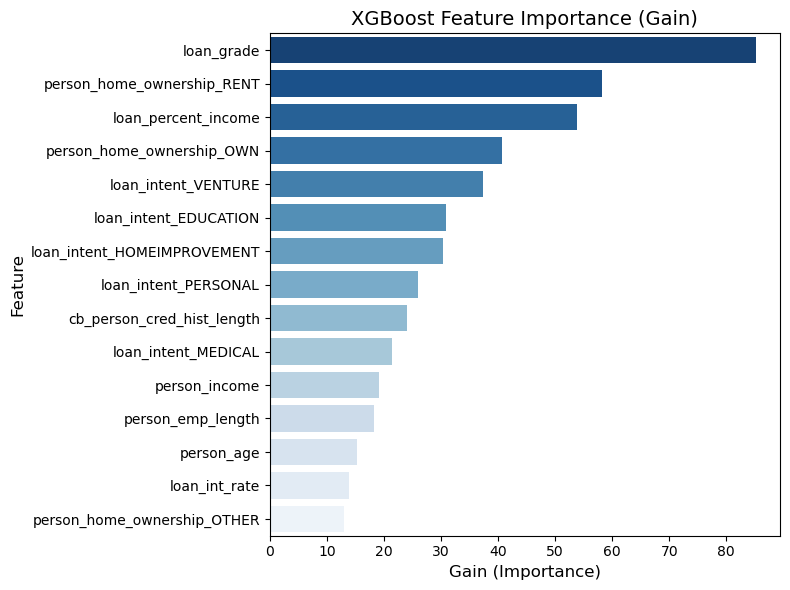

In [107]:
top_feats = imp_df.head(15)
plt.figure(figsize=(8,6))
sns.barplot(
    data=top_feats,
    x="gain", 
    y="feature", 
    palette="Blues_r"   # rəng palitrası (daha tünddən açığa)
)
plt.title("XGBoost Feature Importance (Gain)", fontsize=14)
plt.xlabel("Gain (Importance)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


In [108]:
# ------------------ Logistic Regression prediction ------------------
lr_prob = best_lr.predict_proba(X_test.iloc[0:1])[:, 1][0]  # ehtimal (bad olma)
lr_pred = best_lr.predict(X_test.iloc[0:1])[0]              # 0=good, 1=bad

print("Logistic Regression:")
print("  Bad ehtimalı:", round(lr_prob, 3))
print("  Prediction  :", "BAD" if lr_pred==1 else "GOOD")

# ------------------ XGBoost prediction ------------------
xgb_prob = calibrated_xgb.predict_proba(X_test.iloc[0:1])[:, 1][0]
xgb_pred = calibrated_xgb.predict(X_test.iloc[0:1])[0]

print("\nXGBoost:")
print("  Bad ehtimalı:", round(xgb_prob, 3))
print("  Prediction  :", "BAD" if xgb_pred==1 else "GOOD")


Logistic Regression:
  Bad ehtimalı: 0.421
  Prediction  : GOOD

XGBoost:
  Bad ehtimalı: 0.186
  Prediction  : GOOD
